In [1]:
#Loading the libraries we need: numpy, scipy, matplotlib 
import numpy as np 
import scipy 
import imageio 
import matplotlib.pyplot as plt 
import skimage  #install scikit-image 
import warnings 
warnings.filterwarnings("ignore") 

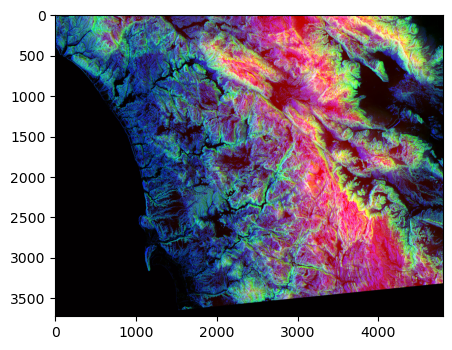

In [99]:
#Creating a numpy array from an image file: 
#Lets choose a WIFIRE satellite image file as an ndarray and display its type 
from skimage import data 
photo_data = imageio.imread('data/sd-3layers.jpg') 
type(photo_data)
#Let us see what is in this image. 
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show() 

In [61]:
#Let us see how does the photo_data looks like: 
print(photo_data) 

[[[  0  22  35]
  [  0  11  57]
  [ 19  32 128]
  ...
  [ 19  21  98]
  [  0   6  28]
  [  0  19   0]]

 [[ 30  64 109]
  [ 29  46 128]
  [ 25  33 157]
  ...
  [  1   5  50]
  [  0   5  34]
  [  0   4  28]]

 [[ 23  57 155]
  [ 16  35 174]
  [ 15  24 189]
  ...
  [  0   5   9]
  [  0   5  34]
  [  0   2  69]]

 ...

 [[  2   0   1]
  [  2   0   1]
  [  2   0   1]
  ...
  [  2   0   1]
  [  2   0   1]
  [  2   0   1]]

 [[  2   0   1]
  [  2   0   1]
  [  2   0   1]
  ...
  [  2   0   1]
  [  2   0   1]
  [  2   0   1]]

 [[  2   0   1]
  [  2   0   1]
  [  2   0   1]
  ...
  [  2   0   1]
  [  2   0   1]
  [  2   0   1]]]


In [41]:
#Let us print the shape of photo_data 
print(photo_data.shape) 

(3725, 4797, 3)


In [45]:
#The shape of the ndarray show that it is a three layered matrix. 
# The first two numbers here are length and width, and 
# the third number (i.e. 3) is for three layers: Red, Green and Blue. 
 
#RGB Color Mapping in the Photo: 
#RED pixel indicates Altitude 
#BLUE pixel indicates Aspect 
#GREEN pixel indicates Slope 
#The higher values denote higher altitude, aspect and slope. 

In [47]:
photo_data.size # Data Size 

53606475

In [49]:
photo_data.min(), photo_data.max() # Maximum and Minimum of the pixel value 

(0, 255)

In [51]:
photo_data.mean() # Average Pixel Value 

53.76079951162616

In [104]:
#Pixel on the 150th Row and 250th Column: 
photo_data[150, 250] # It will print the Red, Green , Blue Value in order 

array([ 17,  35, 255], dtype=uint8)

In [106]:
photo_data[150, 250, 1] # It will print out the Green Value 

35

In [108]:
#Pixel on the 2nd Row and 2nd Column: 
photo_data[1, 1] # It will print the Red, Green, Blue Value in order 

array([ 29,  46, 128], dtype=uint8)

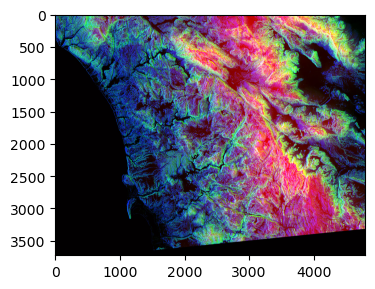

In [110]:
#Set a Pixel to All Zeros 
#We can set all three layer in a pixel as once by assigning zero globally to that 
# (row,column) pairing. However, setting one pixel to zero is not noticeable. 
photo_data = imageio.imread('data/sd-3layers.jpg') 
photo_data[150, 250] = 0 # We set all three layers of RGB of this 
plt.figure(figsize=(4,10)) 
plt.imshow(photo_data) 
plt.show() 

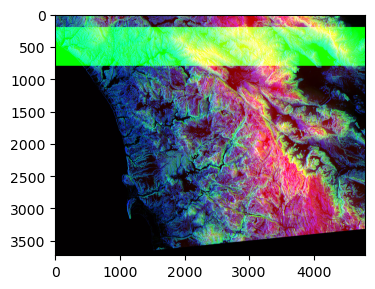

In [65]:
#Changing colors in a Range 
#We can also use a range to change the pixel values. As an example, 
# let us set the green layer for rows 200 to 800 to full intensity. 
#We will set the value of Green layer to full intensity for rows 200 (inclusive) 
# to 800 (exclusive) for all the columns. 
photo_data = imageio.imread('data/sd-3layers.jpg') 
photo_data[200:800, : ,1] = 255 
plt.figure(figsize=(4,10)) 
plt.imshow(photo_data) 
plt.show() 

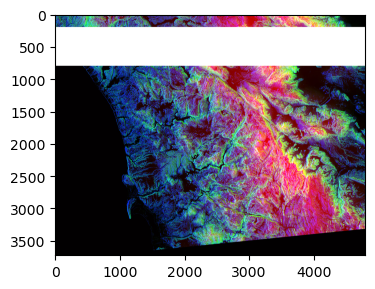

In [67]:
#We will set the value of Red, Green and Blue layer to full intensity 
# (we will get a white block) for rows 200 (inclusive) to 800 (exclusive) for all the columns. 
photo_data = imageio.imread('data/sd-3layers.jpg') 
photo_data[200:800, :] = 255 
plt.figure(figsize=(4,10)) 
plt.imshow(photo_data) 
plt.show() 

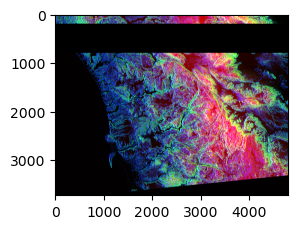

In [57]:
#We will set the value of Red, Green and Blue layer to least intensity 
# (we will get a black block) for rows 200 (inclusive) to 800 (exclusive) for all the columns. 
photo_data = imageio.imread('data/sd-3layers.jpg') 
photo_data[200:800, :] = 0 
plt.figure(figsize=(3,10)) 
plt.imshow(photo_data) 
plt.show() 

In [112]:
#Pick all Pixels with Low Values 
photo_data = imageio.imread('data/sd-3layers.jpg') 
print("Shape of photo_data:", photo_data.shape) 

Shape of photo_data: (3725, 4797, 3)


In [114]:
low_value_filter = photo_data < 100 #Create a boolen array with the same shape as of phoyo_data 
print("Shape of low_value_filter:", low_value_filter.shape) 

Shape of low_value_filter: (3725, 4797, 3)


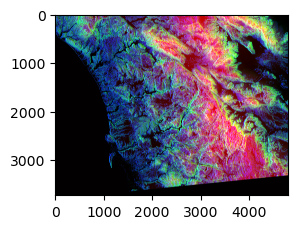

In [116]:
#Filtering Out Low Values: 
plt.figure(figsize=(3,10)) 
plt.imshow(photo_data) 

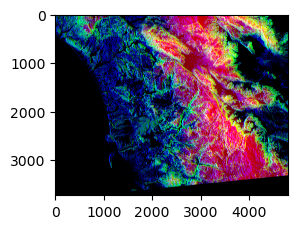

In [120]:
#Whenever the low_value_filter is True, set value to 0. 
photo_data[low_value_filter] = 0 #set low values to 0 
plt.figure(figsize=(3,10)) 
plt.imshow(photo_data) 
plt.show() 

In [122]:
#More Row and Column Operations 
#We can design complex patterns by making columns a function 
# of rows or vice-versa. Here we try a linear relationship between rows and columns. 
rows_range = np.arange(len(photo_data)) #Create a range array 
print(rows_range) 
cols_range = rows_range #Create a range array 
print(cols_range) 
print(type(rows_range)) 

[   0    1    2 ... 3722 3723 3724]
[   0    1    2 ... 3722 3723 3724]
<class 'numpy.ndarray'>


In [126]:
#We are setting the selected rows and columns to the maximum value of 255 
photo_data[rows_range, cols_range] = 255 
print(photo_data) 

[[[255 255 255]
  [  0   0   0]
  [  0   0 128]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0 109]
  [255 255 255]
  [  0   0 157]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0 155]
  [  0   0 174]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


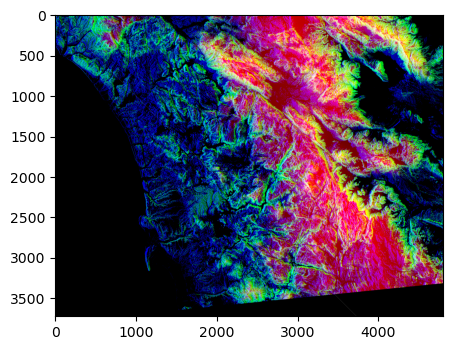

In [130]:
plt.figure(figsize=(5,5)) 
plt.imshow(photo_data) 
plt.show()

In [25]:
# We see a diagonal white line that is a result of our operation. 
#Masking Images 
#Now let us try to mask the image in shape of a circular disc. 
total_rows, total_cols, total_layers = photo_data.shape 
print("photo_data = ", photo_data.shape) 
X, Y = np.ogrid[:total_rows, :total_cols] 
print("X = ", X.shape, " and Y = ", Y.shape) 
from IPython.display import Image 
Image("Images/figure.png") 
center_row, center_col = total_rows / 2, total_cols / 2 
print("center_row = ", center_row, "AND center_col = ", center_col) 

photo_data =  (3725, 4797, 3)
X =  (3725, 1)  and Y =  (1, 4797)
center_row =  1862.5 AND center_col =  2398.5


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


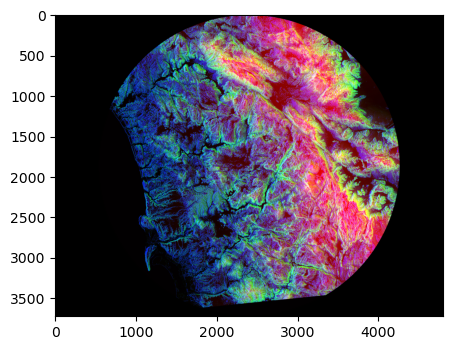

In [73]:
#print(X - center_row) 
#print(Y - center_col) 
dist_from_center = (X - center_row)**2 + (Y - center_col)**2 
#print(dist_from_center) 
radius = (total_rows / 2)**2 
#print("Radius = ", radius) 
circular_mask = (dist_from_center > radius) 
#print(circular_mask) 
print(circular_mask[1500:1700,2000:2200]) 
photo_data = imageio.imread('data/sd-3layers.jpg') 
photo_data[circular_mask] = 0 
plt.figure(figsize=(5,15)) 
plt.imshow(photo_data) 

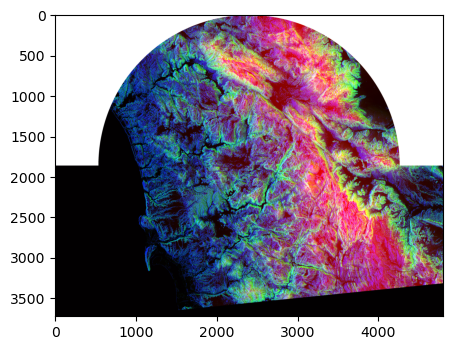

In [75]:
#Further Masking 
#We can further improve the mask, for example just get upper half disc. 
X, Y = np.ogrid[:total_rows, :total_cols] 
half_upper = X < center_row # this line generates a mask for all rows above the center 
half_upper_mask = np.logical_and(half_upper, circular_mask) 
photo_data = imageio.imread('data/sd-3layers.jpg') 
photo_data[half_upper_mask] = 255 
#photo_data[half_upper_mask] = random.randint(200,255) 
plt.figure(figsize=(5,15)) 
plt.imshow(photo_data) 
plt.show() 

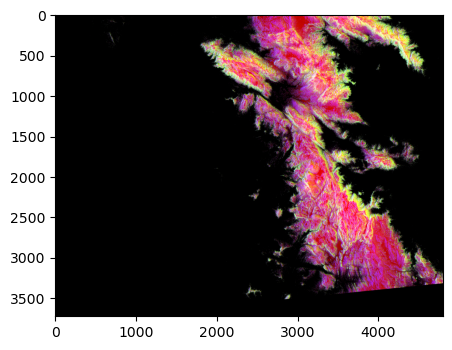

In [77]:
photo_data = imageio.imread('data/sd-3layers.jpg') 
red_mask   = photo_data[:, : ,0] < 150 
photo_data[red_mask] = 0 
plt.figure(figsize=(5,15)) 
plt.imshow(photo_data) 
plt.show() 

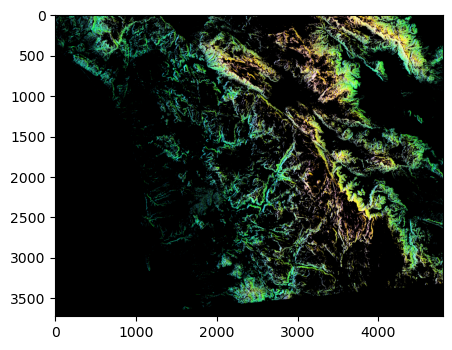

In [79]:
#Detecting Highl-GREEN Pixels 
photo_data = imageio.imread('data/sd-3layers.jpg') 
green_mask = photo_data[:, : ,1] < 150 
photo_data[green_mask] = 0 
plt.figure(figsize=(5,15)) 
plt.imshow(photo_data) 
plt.show() 

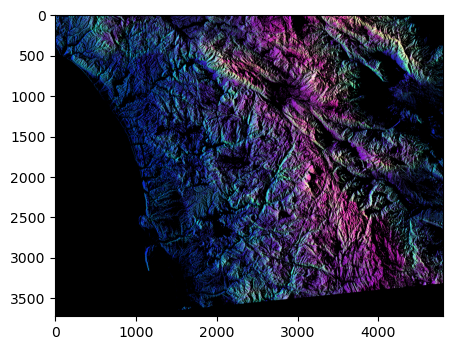

In [81]:
#Detecting Highly-BLUE Pixels 
photo_data = imageio.imread('data/sd-3layers.jpg') 
blue_mask  = photo_data[:, : ,2] < 150 
photo_data[blue_mask] = 0 
plt.figure(figsize=(5,15)) 
plt.imshow(photo_data) 
plt.show() 

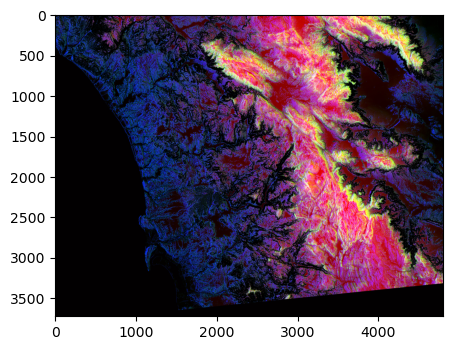

In [83]:
#Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE 
photo_data = imageio.imread('data/sd-3layers.jpg') 
red_mask   = photo_data[:, : ,0] < 150 
green_mask = photo_data[:, : ,1] > 100 
blue_mask  = photo_data[:, : ,2] < 100 
final_mask = np.logical_and(red_mask, green_mask, blue_mask) 
photo_data[final_mask] = 0 
plt.figure(figsize=(5,15)) 
plt.imshow(photo_data) 
plt.show() 

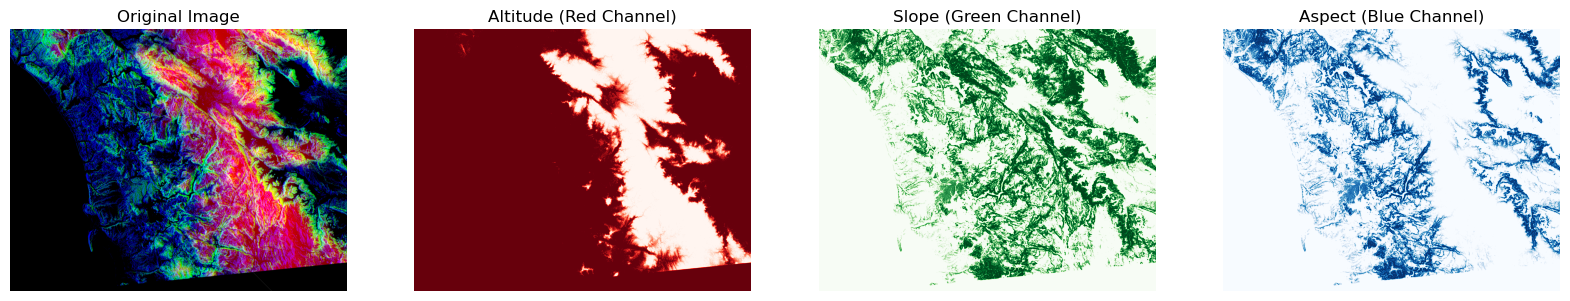

In [132]:
# Display the original image and each channel
fig, axs = plt.subplots(1, 4, figsize=(20, 10))

axs[0].imshow(photo_data)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(red_mask, cmap='Reds')
axs[1].set_title('Altitude (Red Channel)')
axs[1].axis('off')

axs[2].imshow(green_mask, cmap='Greens')
axs[2].set_title('Slope (Green Channel)')
axs[2].axis('off')

axs[3].imshow(blue_mask, cmap='Blues')
axs[3].set_title('Aspect (Blue Channel)')
axs[3].axis('off')

plt.show()

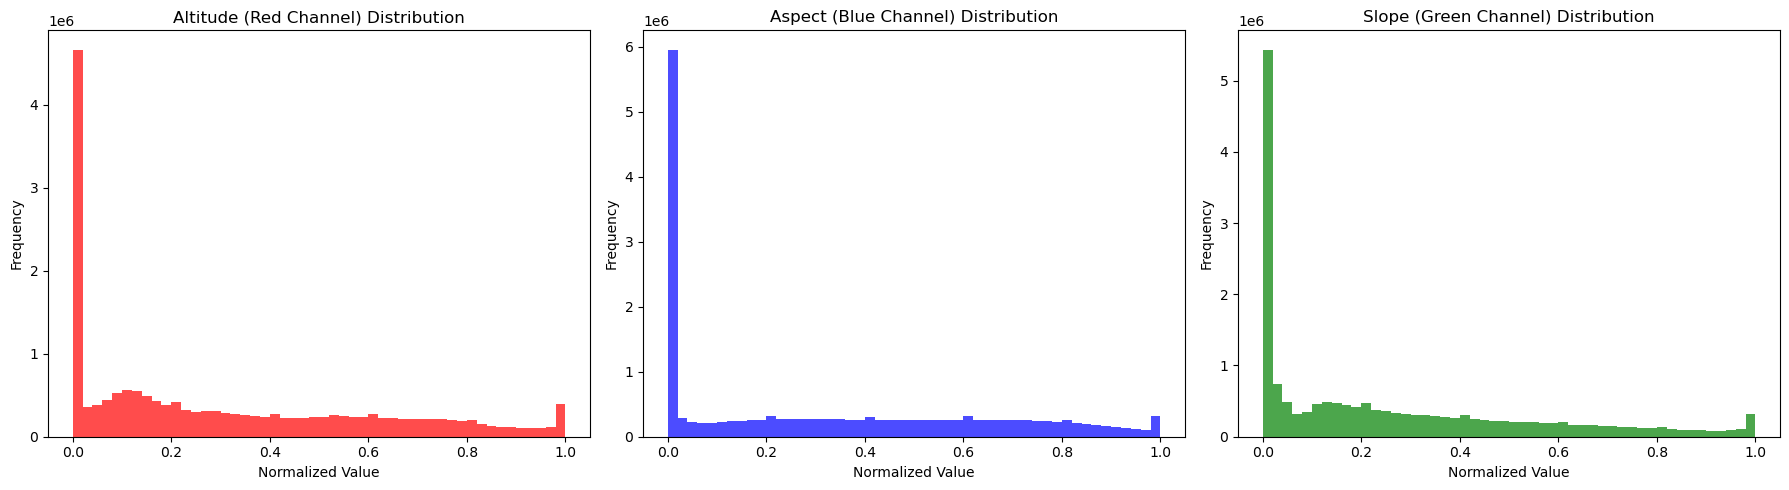

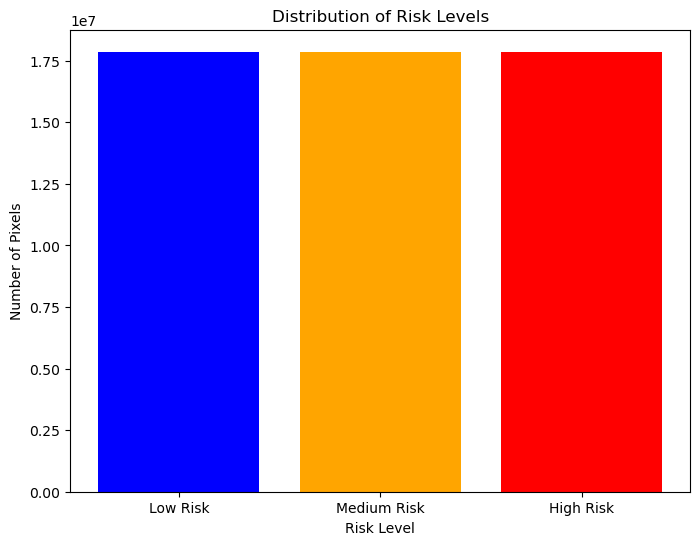

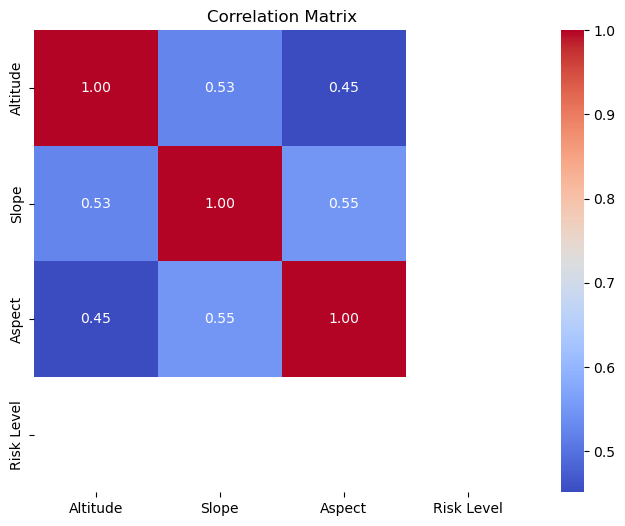

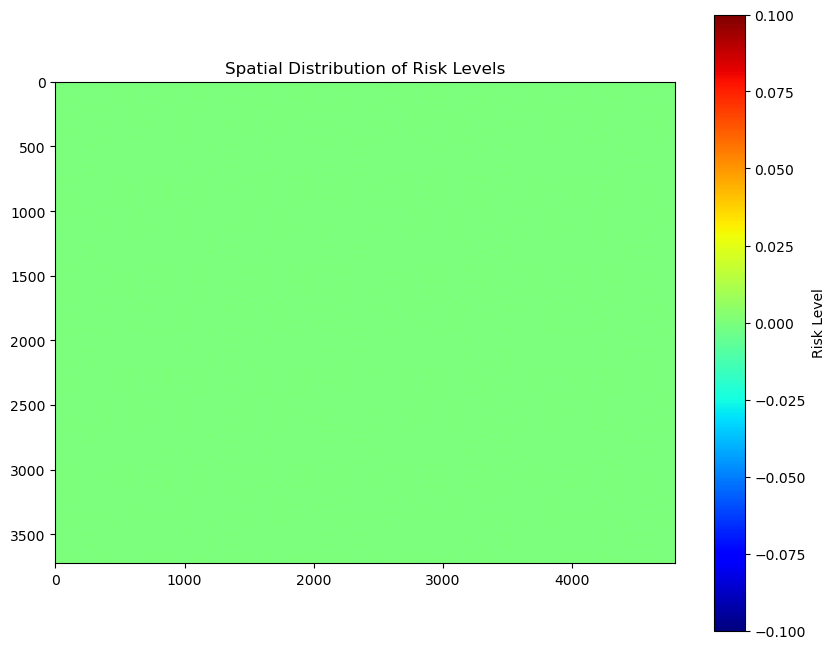

In [95]:
import seaborn as sns
from PIL import Image

image_path = 'data/sd-3layers.jpg'
image = Image.open(image_path)
img_array = np.array(image)
# Extract RGB channels
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

# Normalize channels
red_norm = red_channel / 255.0
green_norm = green_channel / 255.0
blue_norm = blue_channel / 255.0

# Create synthetic risk labels
risk_map = (0.5 * red_norm) + (0.3 * green_norm) - (0.2 * blue_norm)
risk_levels = np.zeros_like(risk_map)

# 1. Distribution of Altitude (Red), Aspect (Blue), and Slope (Green)
plt.figure(figsize=(18, 5))

# Altitude Distribution
plt.subplot(1, 3, 1)
plt.hist(red_norm.flatten(), bins=50, color='red', alpha=0.7)
plt.title('Altitude (Red Channel) Distribution')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

# Aspect Distribution
plt.subplot(1, 3, 2)
plt.hist(blue_norm.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Aspect (Blue Channel) Distribution')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

# Slope Distribution
plt.subplot(1, 3, 3)
plt.hist(green_norm.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Slope (Green Channel) Distribution')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Distribution of Risk Levels
plt.figure(figsize=(8, 6))
unique, counts = np.unique(risk_levels, return_counts=True)
plt.bar(['Low Risk', 'Medium Risk', 'High Risk'], counts, color=['blue', 'orange', 'red'])
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Number of Pixels')
plt.show()

# 3. Correlation Analysis
import pandas as pd

# Create DataFrame for Correlation
data_df = pd.DataFrame({
    'Altitude': red_norm.flatten(),
    'Slope': green_norm.flatten(),
    'Aspect': blue_norm.flatten(),
    'Risk Level': risk_levels.flatten()
})

correlation_matrix = data_df.corr()

# Plot Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4. Visualization of Spatial Patterns
plt.figure(figsize=(10, 8))
plt.imshow(risk_levels, cmap='jet')
plt.title('Spatial Distribution of Risk Levels')
plt.colorbar(label='Risk Level')
plt.show()
